In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/kc_house_data.csv')

df.rename(columns={'date': 'date'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df.info()

df['month'] = df['date'].dt.month
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,5
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,6
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,4
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3


<Axes: >

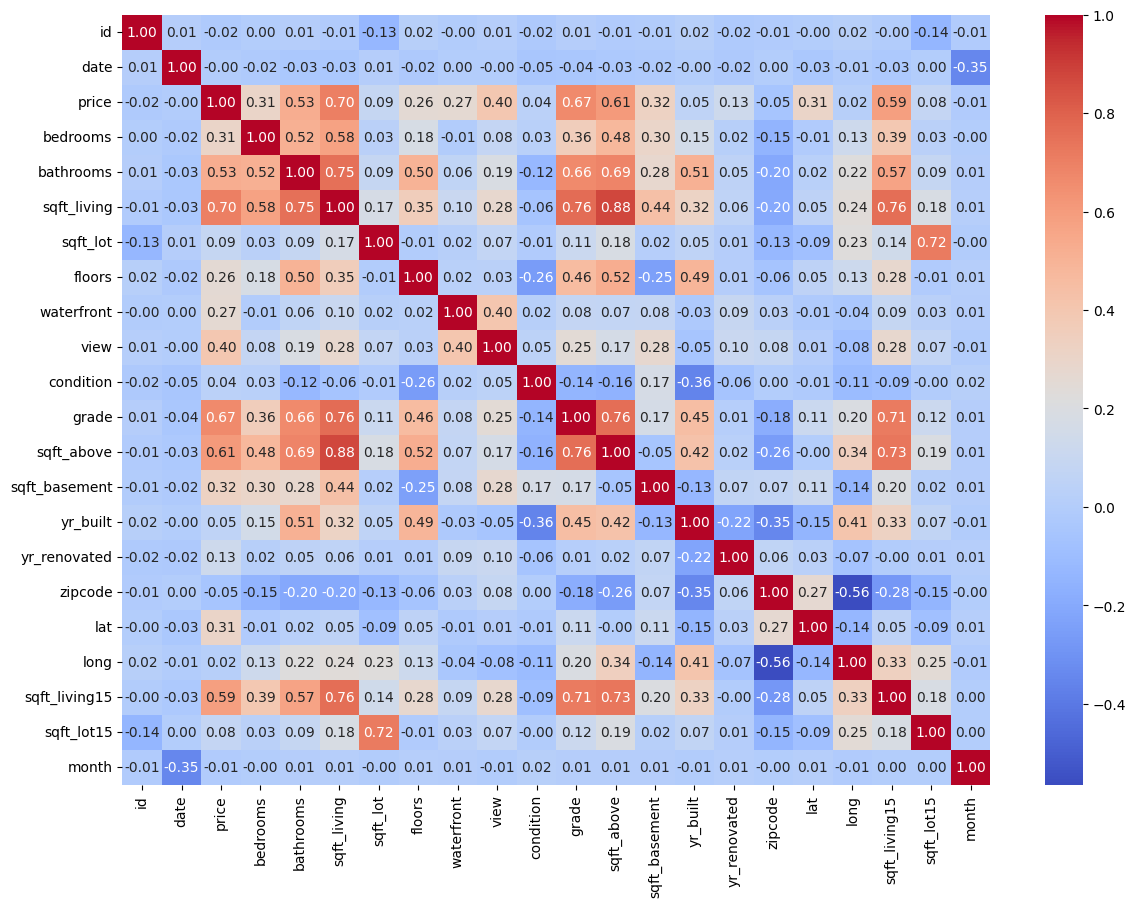

In [3]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

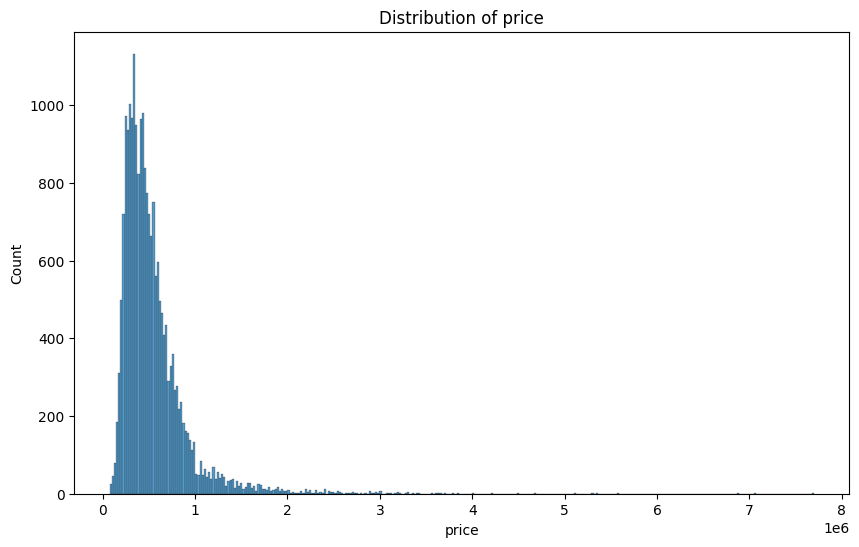

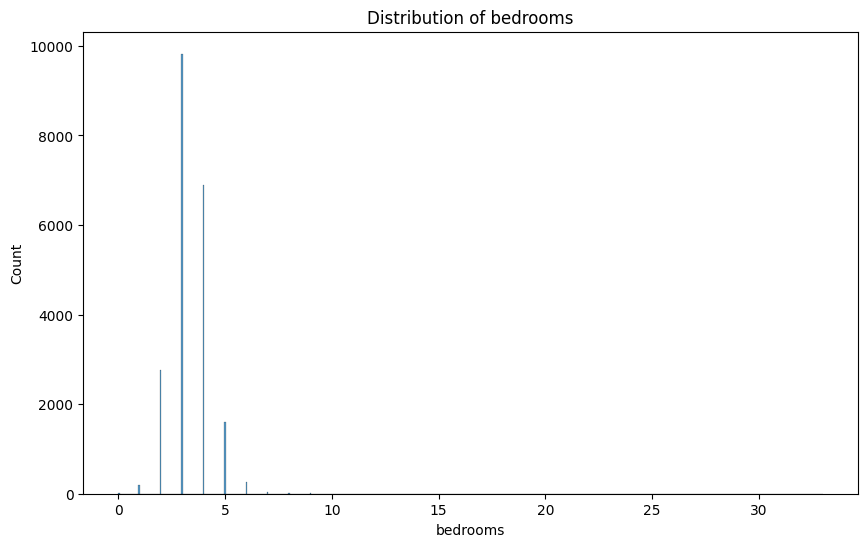

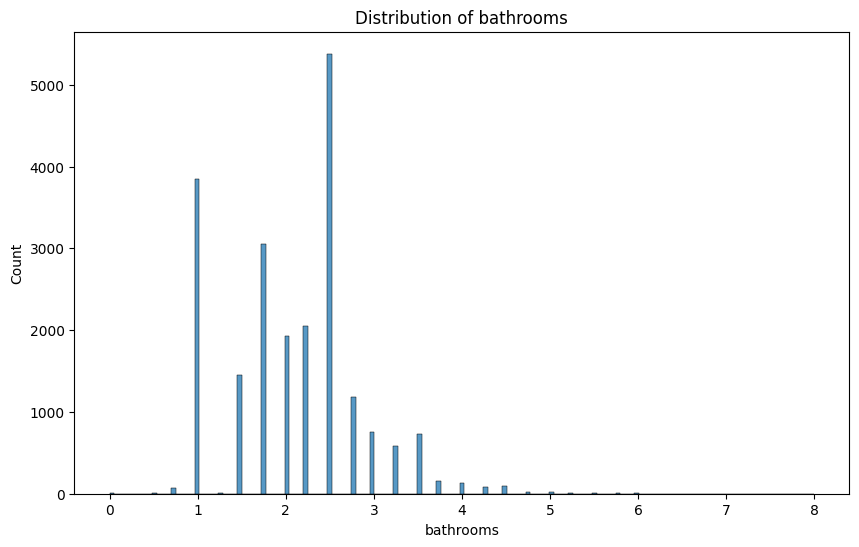

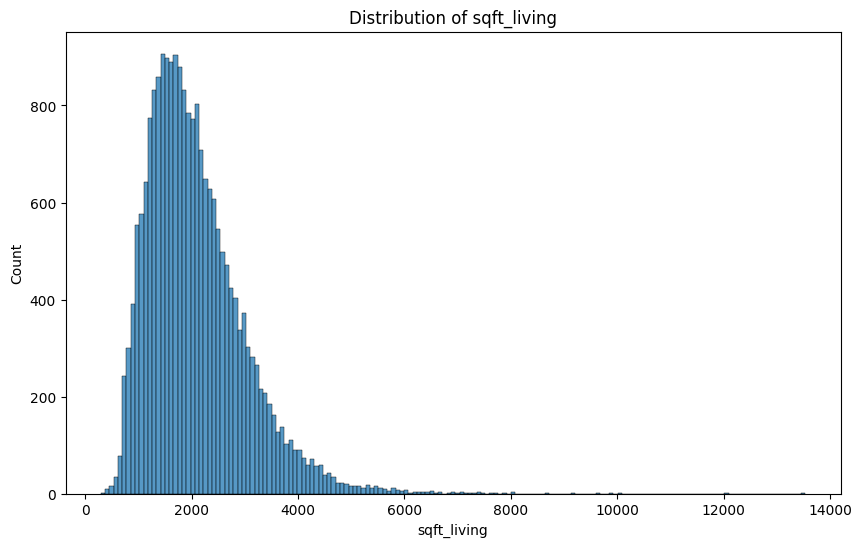

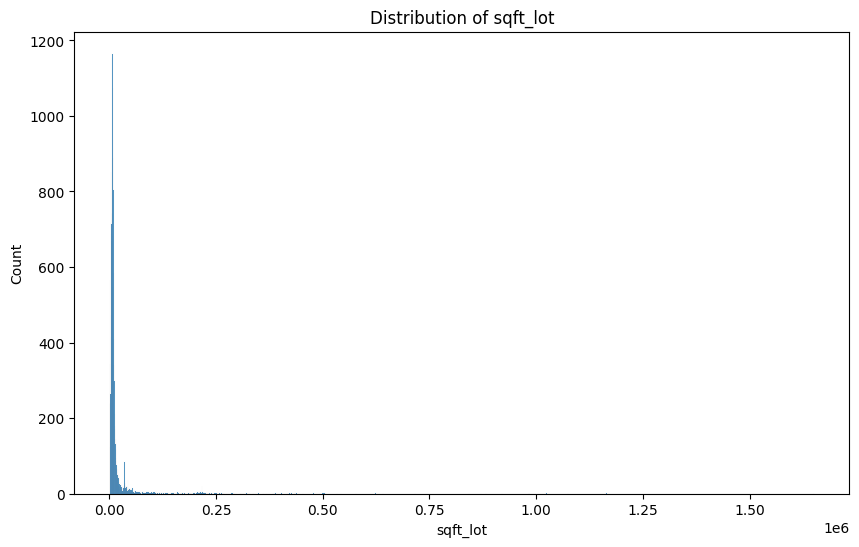

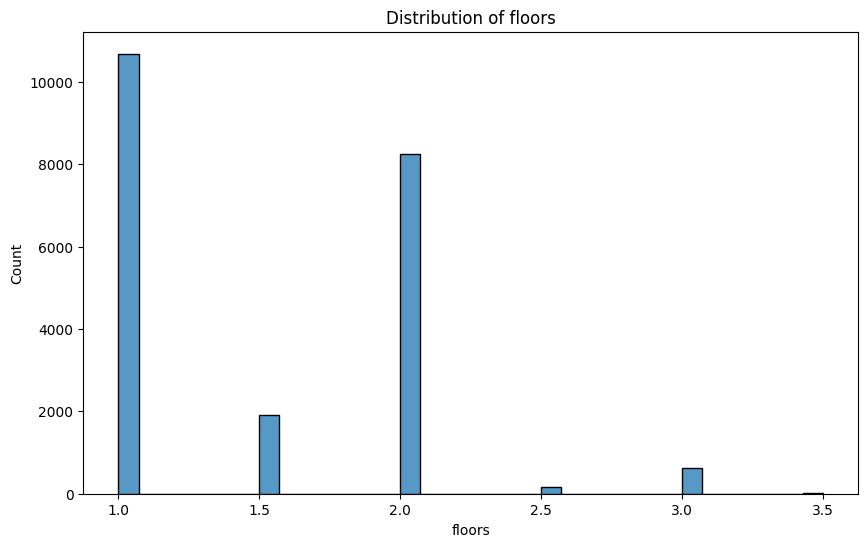

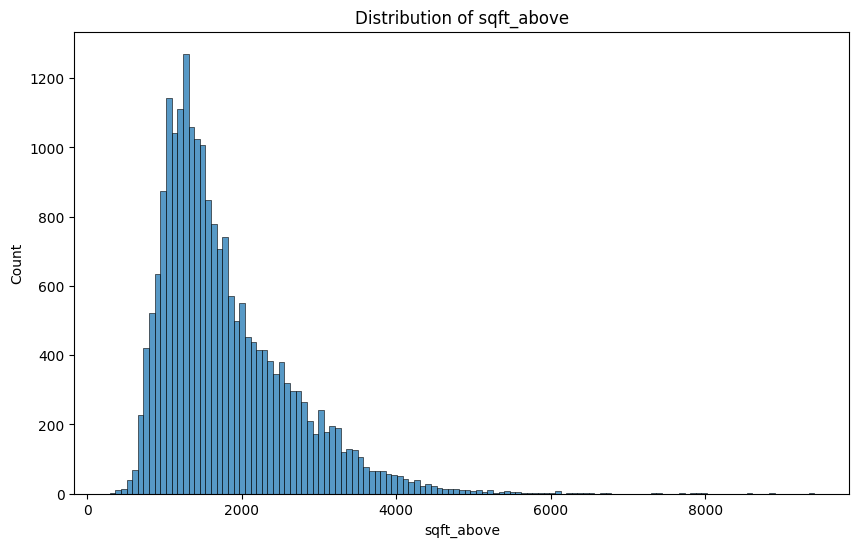

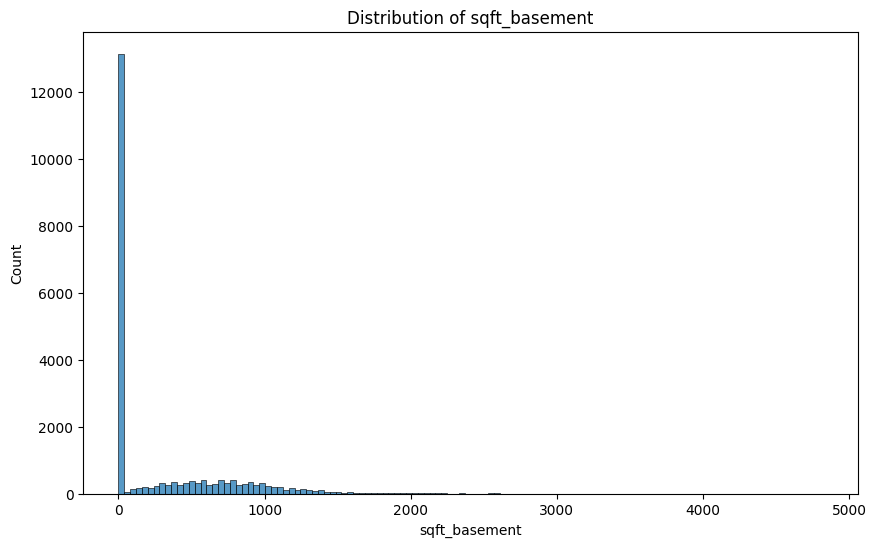

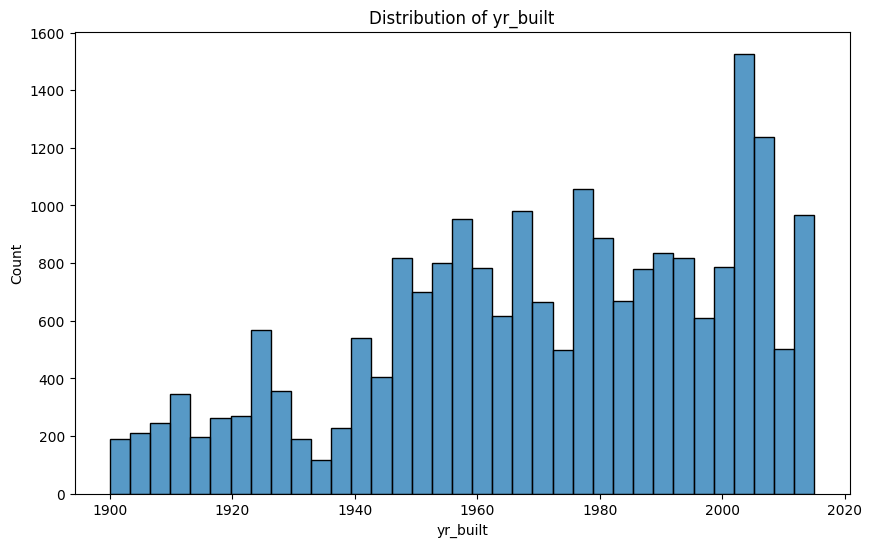

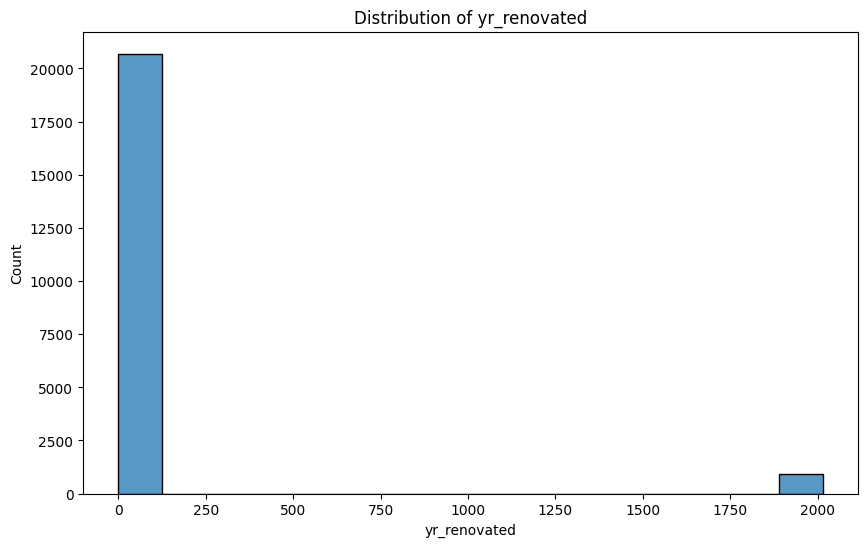

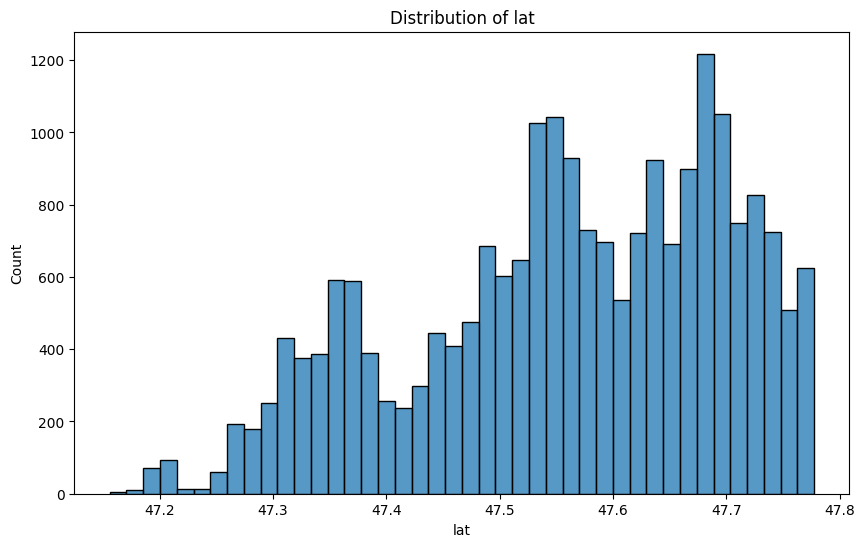

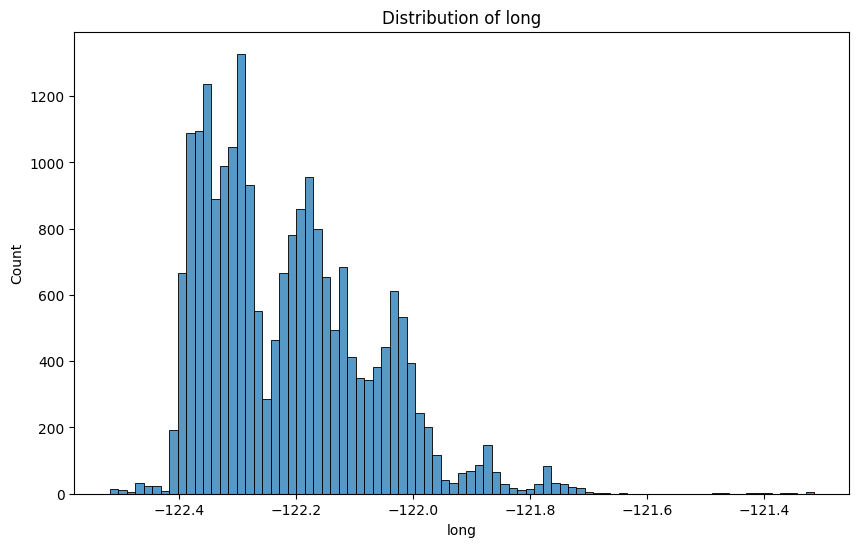

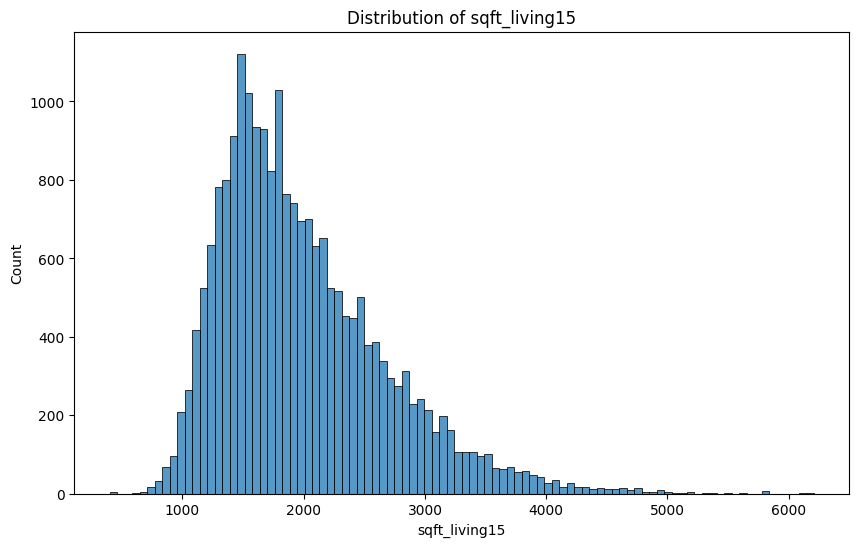

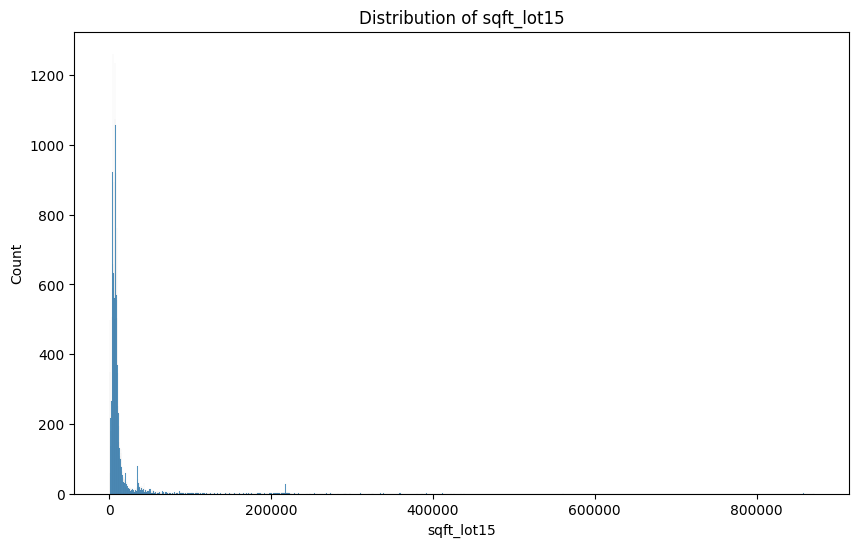

In [4]:
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
                'sqft_living15', 'sqft_lot15']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()



**FOR ABOVE SEE IF YOU CAN SWITCH DATE FROM A MEASUREMENT FROM START DATE TO END DATE**

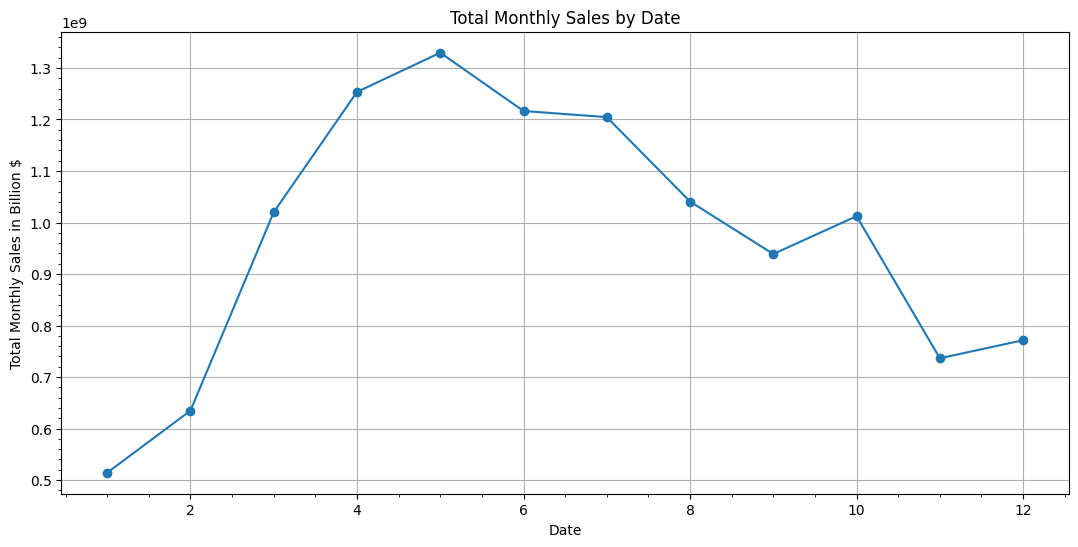

In [5]:
df_sales_by_month = df.groupby('month')['price'].sum().reset_index()

plt.figure(figsize=(13, 6))
plt.plot(df_sales_by_month['month'], df_sales_by_month['price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales in Billion $')
plt.title('Total Monthly Sales by Date')
plt.grid(True)
plt.minorticks_on()
plt.show()



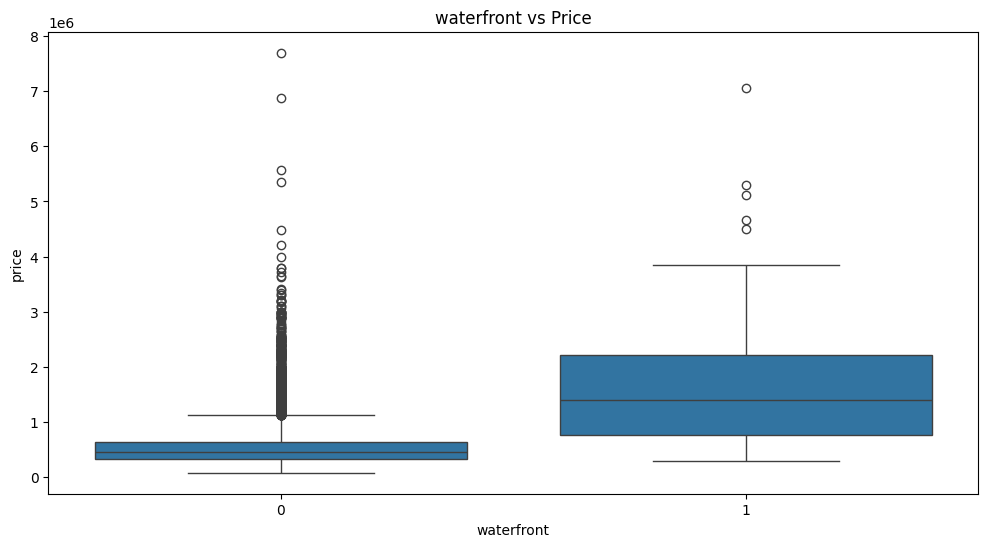

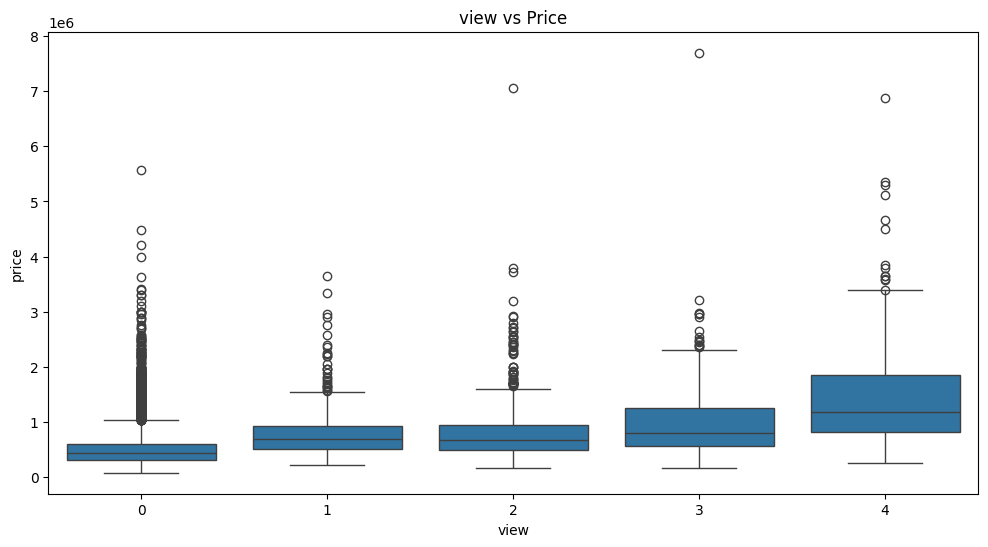

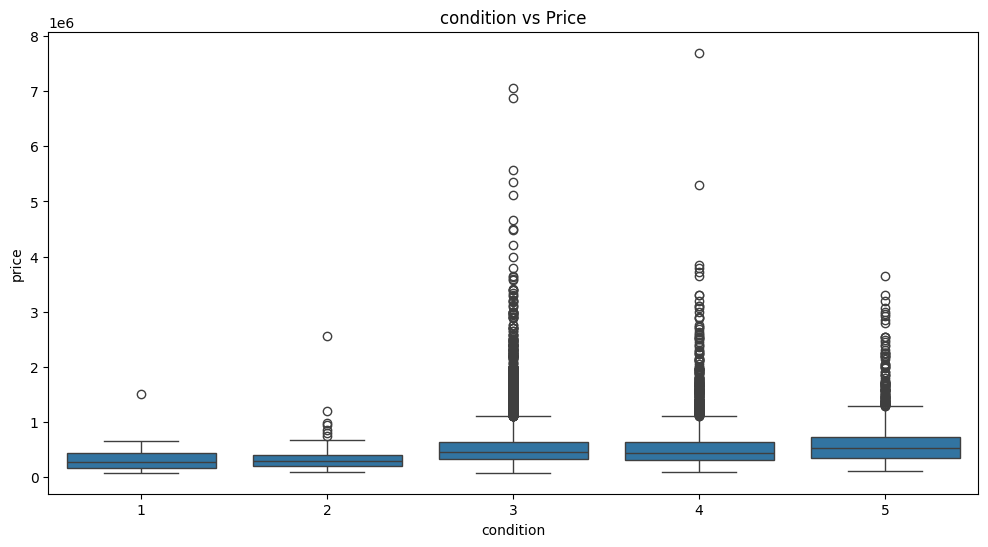

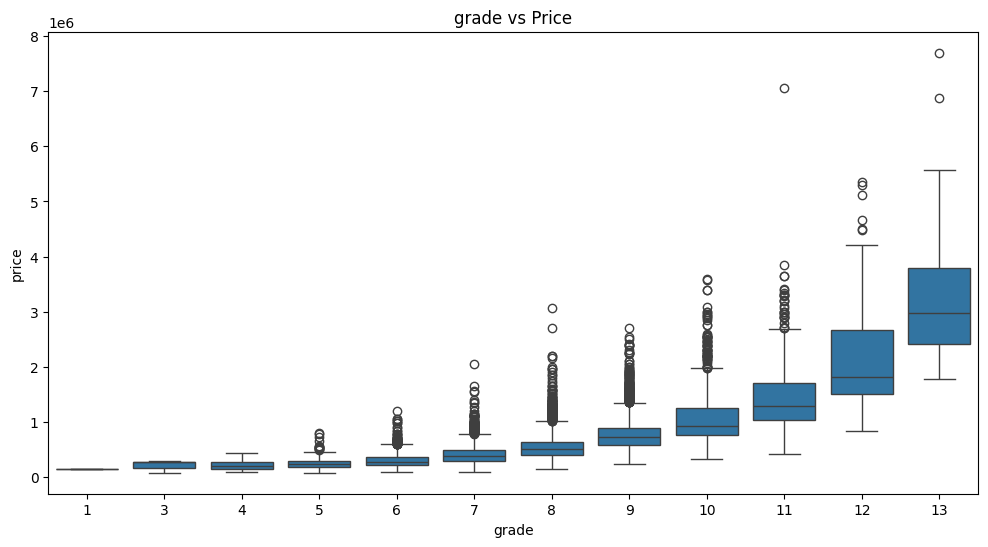

In [6]:
categorical_cols = ['waterfront', 'view', 'condition', 'grade']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.show()


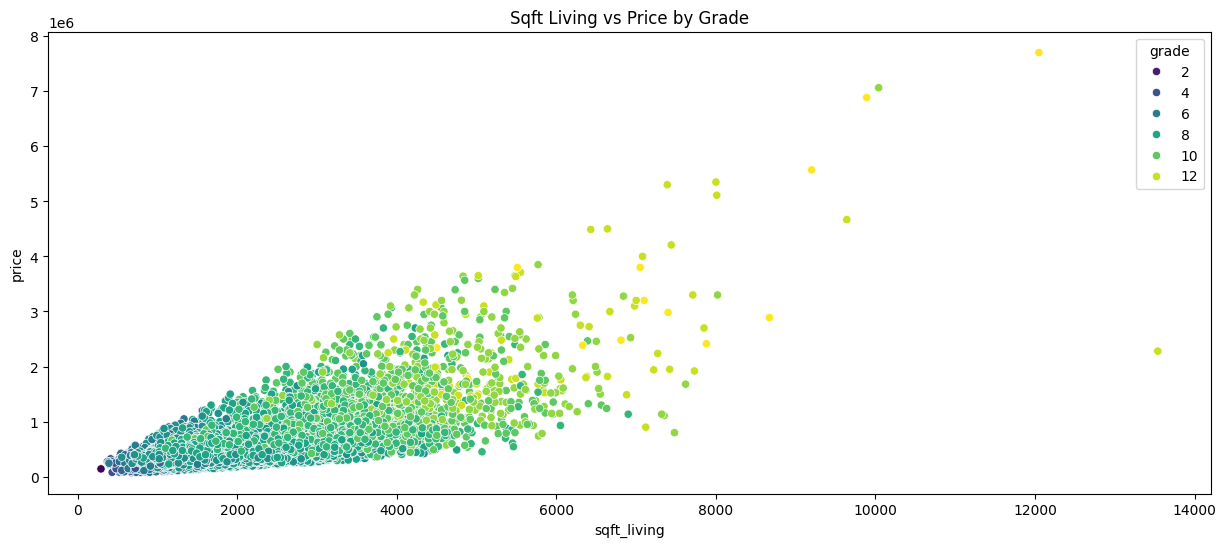

In [7]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='sqft_living', y='price', hue='grade', palette='viridis', data=df)
plt.title('Sqft Living vs Price by Grade')
plt.show()




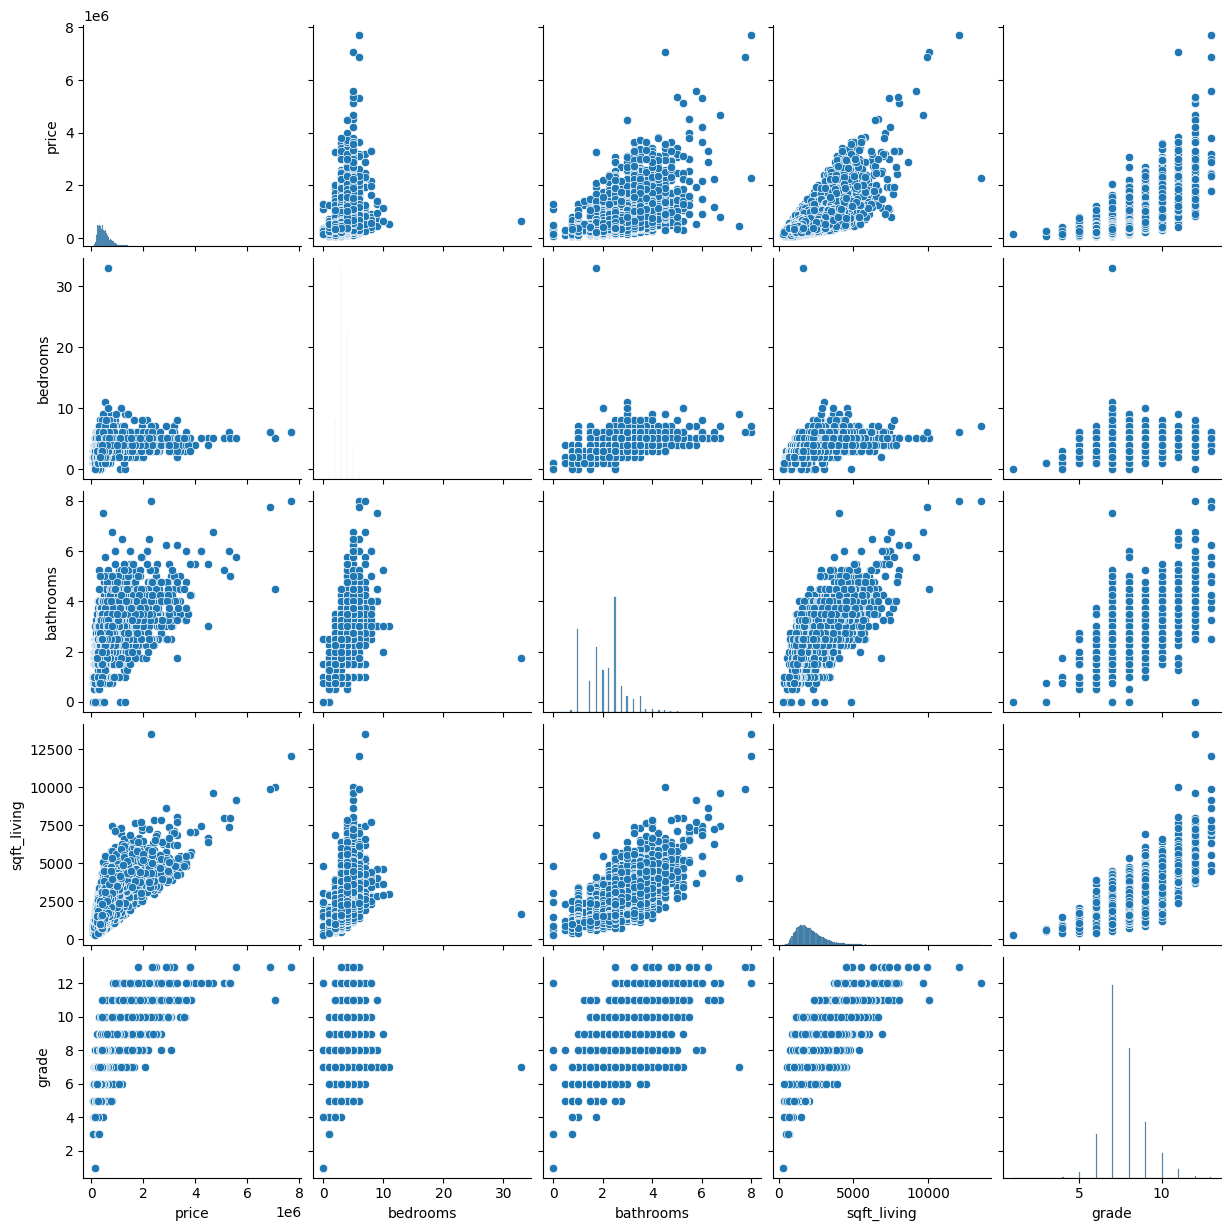

In [8]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])
plt.show()


/tmp/ipykernel_5956/2073489943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renovated['decade'] = (df_renovated['yr_renovated'] // 10) * 10


Text(0, 0.5, 'Average Price in Million $')

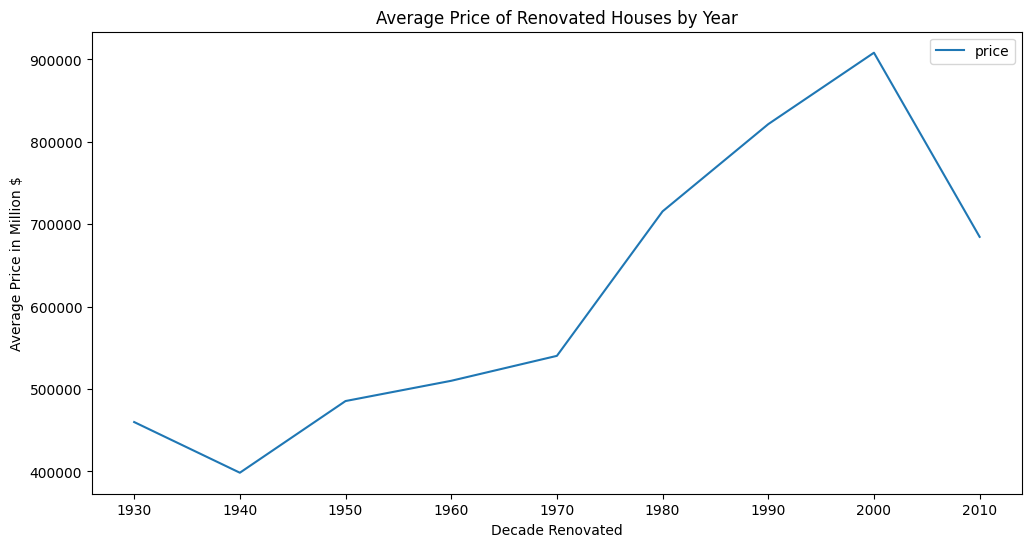

In [7]:
df_renovated = df[df['yr_renovated'] > 0] 
df_renovated['decade'] = (df_renovated['yr_renovated'] // 10) * 10
df_renovated_vs_price = df_renovated.groupby('decade')['price'].mean().reset_index()
df_renovated_vs_price.plot(x='decade', y='price', figsize=(12, 6))
plt.title('Average Price of Renovated Houses by Year')
plt.xlabel('Decade Renovated')
plt.ylabel('Average Price in Million $')
